# Visualizacion de dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv(r'../data/customer-churn-model/Customer Churn Model.txt')


In [8]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


## Scatter Plot

<AxesSubplot:xlabel='Day Mins', ylabel='Day Charge'>

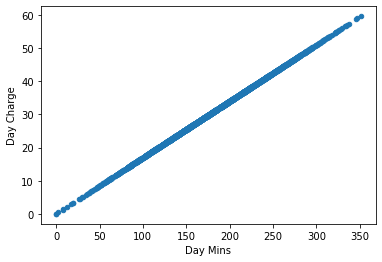

In [9]:
data.plot(kind='scatter', x='Day Mins', y='Day Charge')

<AxesSubplot:xlabel='Night Mins', ylabel='Night Charge'>

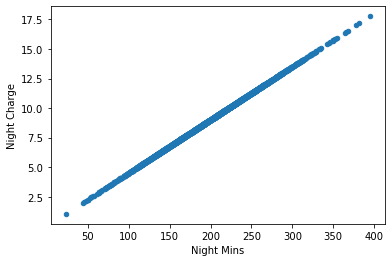

In [10]:
data.plot(kind='scatter', x='Night Mins', y='Night Charge')

Creamos dos variables, y con *matplotlib* con `subplots(2, 2)` indica que creamos una matris de 2x2, mientras que `sharex=True` y `sharey=True` indica que comparten las x e y.

<AxesSubplot:xlabel='Night Calls', ylabel='Night Charge'>

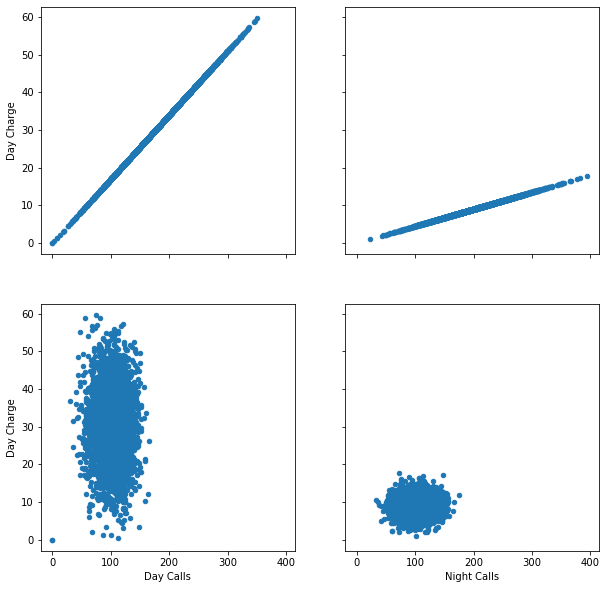

In [11]:
figure, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
data.plot(kind = "scatter", x = "Day Mins", y= "Day Charge", ax=axs[0, 0])
data.plot(kind = "scatter", x = "Night Mins", y= "Night Charge", ax=axs[0, 1])
data.plot(kind = "scatter", x = "Day Calls", y= "Day Charge", ax=axs[1, 0])
data.plot(kind = "scatter", x = "Night Calls", y= "Night Charge", ax=axs[1, 1])

## Histogramas de Frecuencias

Con `plt.hist(dataFrame['column'], bins='numero')`, con la primera entrada definimos el objeto a graficar, mientras que con `bins` marcamos el numero de diviciones del histograma.

In [12]:
n = data.shape[0] # número de filas
k = int(1 + np.ceil(np.log2(n)))


Text(0, 0.5, 'Frecuencia')

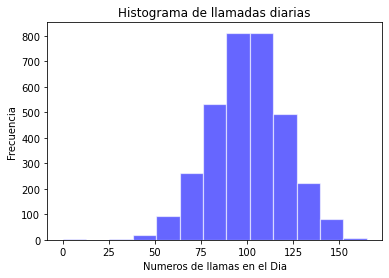

In [13]:

plt.hist(data['Day Calls'], bins=k, color='blue', edgecolor='white', linewidth=1.2, alpha=0.60) 

plt.title("Histograma de llamadas diarias")
plt.xlabel("Numeros de llamas en el Dia")
plt.ylabel("Frecuencia")

## Boxplot, diagrama de cajs y bigotes

### Introducción

El Diagrama de Caja y bigotes (box and whisker plot en inglés ) es un tipo de gráfico que muestra un resumen de una gran cantidad de datos en cinco medidas descriptivas, además de intuir su morfología y simetría.

Este tipo de gráficos nos permite identificar valores atípicos y comparar distribuciones. Además de conocer de una forma cómoda y rápida como el 50% de los valores centrales se distribuyen.

### Definiciones previas
Se puede detectar rápidamente los siguientes valores:

* Primer cuartil: el 25% de los valores son menores o igual a este valor (punto 2 en el gráfico anterior).

* Mediana o Segundo Cuartil: Divide en dos partes iguales la distribución. De forma que  el 50% de los valores son menores o igual a este valor (punto 3 en el gráfico siguiente.

* Tercer cuartil: el 75% de los valores son menores o igual a este valor (punto 4 en el gráfico siguiente).
Rango Intercuartílico (RIC): Diferencia entre el valor del tercer cuartil y el primer cuartil.

![Propiedades basicas del boxplot](https://cdn.conceptosclaros.com/wp-content/uploads/2016/10/boxplot-histograma.png)
 

## Interpretación del gráfico
En el gráfico superior podemos ver como se distribuyen los precios de venta de las diferentes filiales de una empresa.

![Diagrama de caja y bigotes](https://www.pgconocimiento.com/wp-content/uploads/2018/09/Captura-de-pantalla-2018-09-21-a-las-13.18.18-2-790x572.png)


### Caja

Las dimensiones de la caja está determinada por la distancia del rango intercuartílico, que es la diferencia entre el primer (punto 2 del gráfico) y tercer cuartil (punto 4 del gráfico), es decir, que en nuestro gráfico vemos que para la filial central, el 50% de las ventas están entre 1.250 y 3.350 € mientras que en Viajes se concentran entre 2.600 y 3.400.

El segmento que divide la caja en dos partes es la mediana (punto 3 del gráfico), que facilitará la comprensión de si la distribución es simétrica o asimétrica.

Si la mediana se sitúa en el centro de la caja entonces la distribución es simétrica y tanto la media, mediana y moda coinciden.
Si la mediana corta la caja en dos lados desiguales se tiene:
Asimetría positiva o segada a la derecha si la parte más larga de la caja es la parte superior a la mediana. Los datos se concentran en la parte inferior de la distribución. La media suele ser mayor que la mediana.
Asimetría negativa o sesgada a la izquierda si la parte más larga es la inferior a la mediana. Los datos se concentran en la parte superior de la distribución. La media suele ser menor que la mediana.
 

*¡Ojo! Porque un lado de la caja sea más largo que otro, no quiere decir que ese lado contenga más datos. Indica un rango más amplio, por lo que los datos estarán mas dispersos. Un rango menos amplio, indica que los datos están más próximos.*

#### Bigotes
+ La continuación de dos segmentos en la caja se denominan bigotes (whisker) que determina el límite para la detección de valores atípicos.
* Los bigotes deben tener una longitud máxima. Dicha longitud no debe ser superior al 150% del rango intercuartílico.
* Habrá un límite superior (punto 6 del gráfico), que no podrá superar el 1,5  veces el RIC, si el máximo no supera ese valor, la longitud del bigote será desde el tercer
cuartil hasta el máximo.
* Habrá un límite inferior (punto 7 del gráfico), que no podrá superar el 1,5  veces el RIC, si el mínimo no supera ese valor, la longitud del bigote será desde el primer cuartil hasta el mínimo.

+ Valores Atípicos
Los valores atípicos (outilers en inglés) son aquellos puntos que están mas allá del límite inferior o superior.
Puedes ver como crear gráficos de tipo BoxPlot con Atlas SBI en nuestro artículo del KBase Representación de cuartiles con BoxPlot, en este artículo explicamos los pasos necesarios tanto para calcular los cuartiles con instrucciones SQL, como los pasos necesarios para construir el gráfico.

---


### Codigo

Text(0.5, 1.0, 'Boxplot de llamadas diarias')

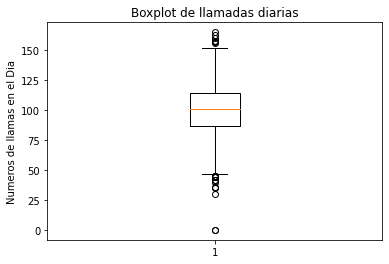

In [14]:
plt.boxplot(data['Day Calls'])
plt.ylabel("Numeros de llamas en el Dia")	
plt.title("Boxplot de llamadas diarias")

In [15]:
data["Day Calls"].describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: Day Calls, dtype: float64

In [16]:
IQR = data["Day Calls"].quantile(0.75) - data["Day Calls"].quantile(0.25)
IQR	

27.0

In [17]:
data["Day Calls"].quantile(0.25) - 1.5*IQR


46.5